# Рубежный контроль №1
## Выполнила: Светашева Юлия, студент ИУ5-23М
Вариант 13, согласно ему номера задач: 13 и 33 для первой и второй соответственно.
Для моей группы доп. требование: для произвольной колонки данных построить график "Ящик с усами (boxplot)".

13  - Для набора данных проведите нормализацию для одного (произвольного) числового признака с использованием функции "обратная зависимость - 1 / X".

33 - Для набора данных проведите процедуру отбора признаков (feature selection). Используйте метод обертывания (wrapper method), алгоритм полного перебора (exhaustive feature selection).

## Подготовка данных

In [55]:
data = pd.read_csv('housing.csv', sep=',', encoding='windows-1251')
df = data.drop('Address', axis=1)
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


In [ ]:
print(df.shape)

(5000, 6)


<Axes: xlabel='Area Population'>

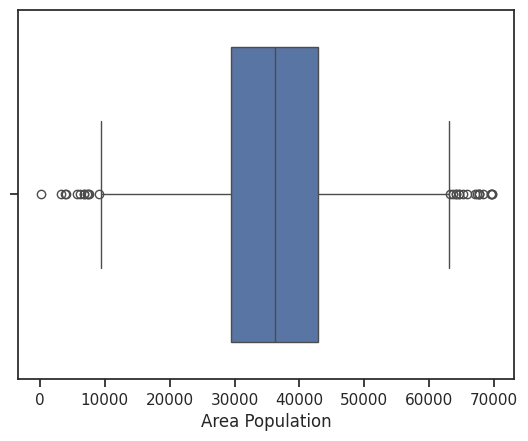

In [ ]:
import seaborn as sns
import pandas as pd

sns.set(style="ticks")
sns.boxplot(x=df['Area Population'])

## Задача №1 (13)
Для набора данных проведите нормализацию для одного (произвольного)
числового признака с использованием функции "обратная зависимость - 1 / X".

Проведём нормализацию для колонки "mag"

In [ ]:
import matplotlib.pyplot as plt  # noqa
import numpy as np  # noqa
import pandas as pd  # noqa
import scipy.stats as stats  # noqa

In [57]:
# Выбор произвольного числового признака для нормализации
selected_feature = 'Area Population'  # Замените на имя вашего выбранного признака

# Применение нормализации с использованием обратной зависимости
normalized_feature = 1 / data[selected_feature]

# Добавление нормализованного признака к DataFrame
data['normalized_' + selected_feature] = normalized_feature

# Вывод первых нескольких строк для проверки результата
print(data.head())

   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0       79545.45857             5.682861                   7.009188   
1       79248.64245             6.002900                   6.730821   
2       61287.06718             5.865890                   8.512727   
3       63345.24005             7.188236                   5.586729   
4       59982.19723             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09      23086.80050  1.059034e+06   
1                          3.09      40173.07217  1.505891e+06   
2                          5.13      36882.15940  1.058988e+06   
3                          3.26      34310.24283  1.260617e+06   
4                          4.23      26354.10947  6.309435e+05   

                                             Address  \
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...   
1  188 Johnson Views Suite 079\nLake Kathleen, CA...   
2  9127 

In [62]:
df["reciprocal"] = 1 / (df["Area Population"])

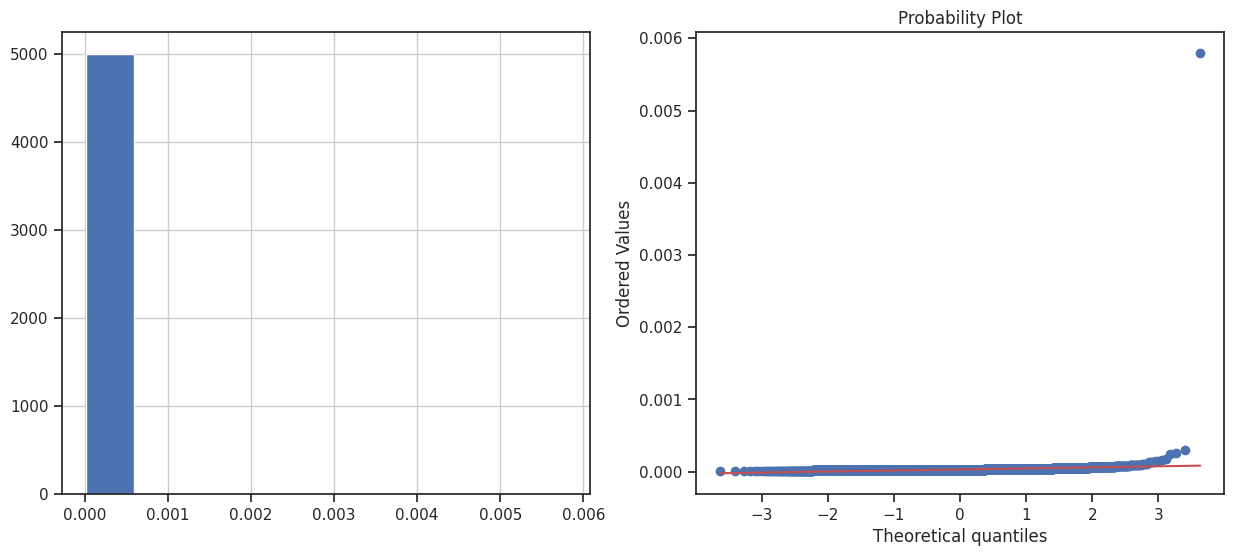

In [64]:
diagnostic_plots(df, "reciprocal")

### Вывод
Как видно, нормализация такой функцией неудачна.

## Задача №2 (33)
Для набора данных проведите процедуру отбора признаков (feature selection).
Используйте метод обертывания (wrapper method),
алгоритм полного перебора (exhaustive feature selection).

In [ ]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector
from sklearn.model_selection import train_test_split  # Importing train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
df = df.dropna()

In [56]:
import pandas as pd
from mlxtend.feature_selection import ExhaustiveFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Разделение на признаки и целевую переменную
X = df.drop(columns=['Price'])  # Укажите имя целевой переменной
y = df['Price']

# Разделение на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание модели для отбора признаков
lr = LinearRegression()

# Создание объекта для отбора признаков с использованием алгоритма полного перебора
efs = ExhaustiveFeatureSelector(estimator=lr, min_features=1, max_features=len(X.columns), scoring='r2', cv=5)

# Запуск процесса отбора признаков
efs = efs.fit(X_train, y_train)

# Вывод результатов
selected_features = X_train.columns[list(efs.best_idx_)]
print("Отобранные признаки:", selected_features)


Features: 31/31

Отобранные признаки: Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')
